# Graph algebra and visualisation using networkx


### Imports and downloads

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #corrects a common bug when loading torch on jupyter

## Exploring networkx

Let us start by examining the way networkx defines graphs by looking at a random graph.

In [2]:
graph = nx.gnm_random_graph(10, 20)

print("A graph is composed of:")
print(" - nodes :", graph.nodes())
print(" - edges :", graph.edges())

A graph is composed of:
 - nodes : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 - edges : [(0, 6), (0, 7), (0, 9), (0, 2), (1, 6), (1, 5), (1, 2), (1, 4), (1, 9), (2, 4), (2, 6), (2, 3), (3, 8), (3, 6), (4, 9), (4, 6), (5, 9), (5, 8), (6, 8), (7, 9)]


As you can see, the nodes attribute of the graph contains the list of the indices of each node. Do not that the edges are not defined with an edjacency matrix, but as the list of all edges. Networkx allows for a third attribute named "edge_attr", which is a dictionaty containing additional information, such as the weight of the edges or specific names. Similarly, "node_attr" allows us to name or give a value to each node.

Let us now look at the representation of a graph by compairing four algorithms.

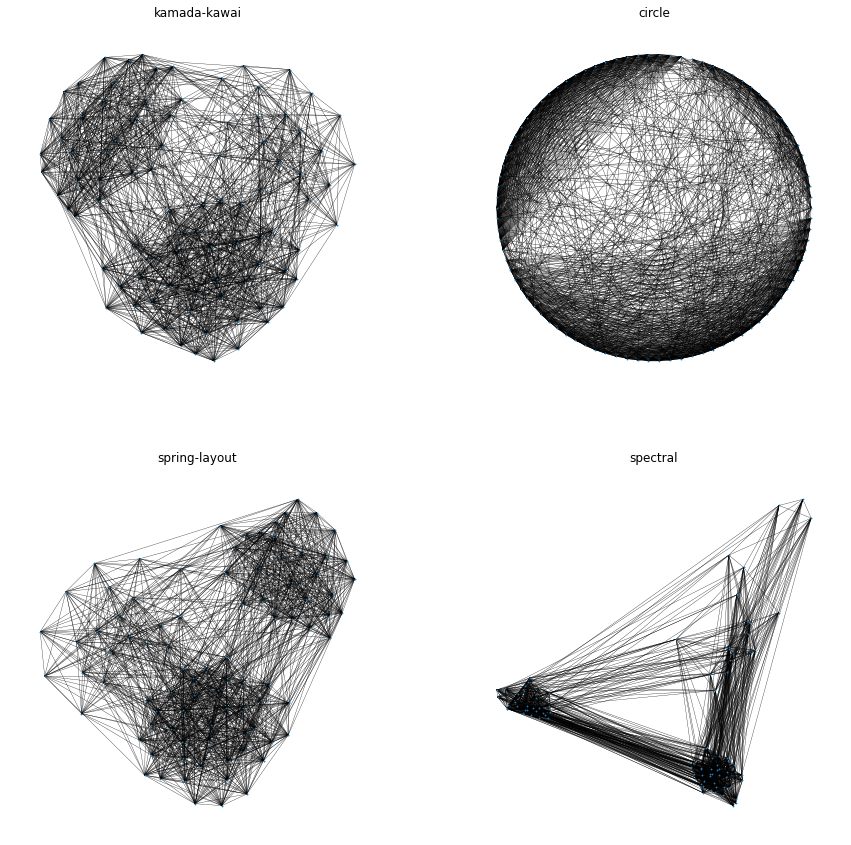

In [3]:
sizes = [20, 30, 40]
probs = [[0.7, 0.1, 0.2], [0.1, 0.9, 0.12], [0.2, 0.12, 0.75]]
graph = nx.stochastic_block_model(sizes, probs, seed=0)
fig, axs = plt.subplots(2, 2, figsize=(15,15))
pos1 = nx.kamada_kawai_layout(graph)
pos2 = nx.circular_layout(graph)
pos3 = nx.spring_layout(graph)
pos4 = nx.spectral_layout(graph)
node_size = 0.7
edge_size = 0.3
axs[0,0].set_title("kamada-kawai")
nx.draw(graph, pos1, ax=axs[0,0], node_size=node_size, width=edge_size)
axs[0,1].set_title("circle")
nx.draw(graph, pos2, ax=axs[0,1], node_size=node_size, width=edge_size)
axs[1,0].set_title("spring-layout")
nx.draw(graph, pos3, ax=axs[1,0], node_size=node_size, width=edge_size)
axs[1,1].set_title("spectral")
nx.draw(graph, pos4, ax=axs[1,1], node_size=node_size, width=edge_size)

As you see, different algorithms yield very different visualisation of the geometry of your graph.

Now, let us create a graph using the correlations between SP500 stocks during every years from 2007 to 2010. The following cell contains a useful piece of code that downloads the close prices of each SP500 stocks based on the definition of the index on Wikipedia.

In [4]:
from graph_auxiliary_functions import get_data_from_yahoo, load_stocks

Let us now recover the data from january 2006 to january 2011.

In [115]:
import datetime as dt
get_data_from_yahoo(reload_sp500=True, start=dt.datetime(2006, 1, 1), end=dt.datetime(2011, 1, 1))

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/yfinance/multi.py", line 199, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/opt/anaconda3/lib/python3.9/site-packages/yfinance/multi.py", line 213, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/opt/anaconda3/lib/python3.9/site-packages/yfinance/base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py", line 157, in _parse_user_dt
    dt = 

Already have MMM
Already have AOS
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADM
Already have ADBE
Already have ADP
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALGN
Already have ALLE
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AMD
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have AON
Already have APA
Already have AAPL
Already have AMAT
Already have APTV
Already have ACGL
Already have ANET
Already have AJG
Already have AIZ
Already have T
Already have ATO
Already have ADSK
Already have AZO
Already have AVB
Already have AVY

KeyboardInterrupt: 

We have downloaded the close prices of the SP500 on the period we defined in csv files, so that we can recover them easily using the method load_stocks. Let us now create the graphs and plot them using the spring layout.

The create_graph method computes correlation between assets and gives a numpy matrix where all correlations below a threshold have been set to 0. Isolated assets are deleted.

In [5]:
from graph_auxiliary_functions import create_graph

df = load_stocks()

threshold = 0.4

corr_2006 = create_graph(df, '2006-01-01', '2007-01-01', threshold=threshold)
corr_2007 = create_graph(df, '2007-01-01', '2008-01-01', threshold=threshold)
corr_2008 = create_graph(df, '2008-01-01', '2009-01-01', threshold=threshold)
corr_2009_1 = create_graph(df, '2009-01-01', '2009-06-01', threshold=threshold)
corr_2009_2 = create_graph(df, '2009-06-01', '2010-01-01', threshold=threshold)
corr_2010 = create_graph(df, '2010-01-01', '2011-01-01', threshold=threshold)

graph_2006 = nx.from_numpy_matrix(corr_2006)
graph_2007 = nx.from_numpy_matrix(corr_2007)
graph_2008 = nx.from_numpy_matrix(corr_2008)
graph_2009_1 = nx.from_numpy_matrix(corr_2009_1)
graph_2009_2 = nx.from_numpy_matrix(corr_2009_2)
graph_2010 = nx.from_numpy_matrix(corr_2010)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 295.26it/s]


Our four representations on financial graphs (here 2008)

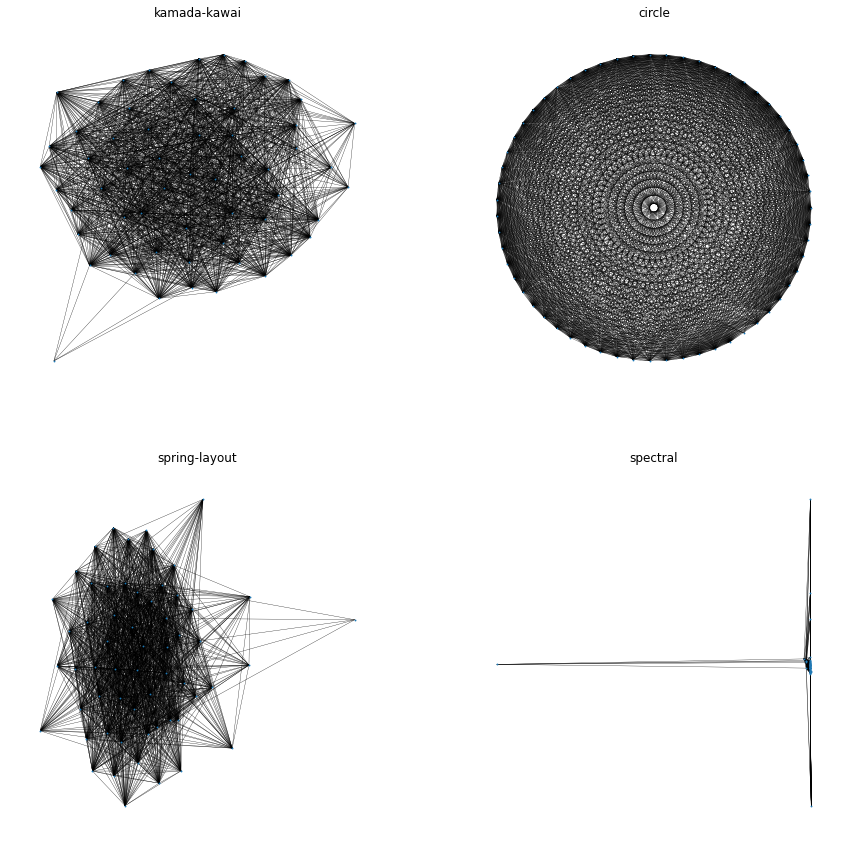

In [6]:
sizes = [20, 30, 40]
probs = [[0.7, 0.1, 0.2], [0.1, 0.9, 0.12], [0.2, 0.12, 0.75]]

pos1 = nx.kamada_kawai_layout(graph_2008)
pos2 = nx.circular_layout(graph_2008)
pos3 = nx.spring_layout(graph_2008, weight="weight")
pos4 = nx.spectral_layout(graph_2008)
node_size = 0.7
edge_size = 0.3
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0,0].set_title("kamada-kawai")
nx.draw(graph_2008, pos1, ax=axs[0,0], node_size=node_size, width=edge_size)
axs[0,1].set_title("circle")
nx.draw(graph_2008, pos2, ax=axs[0,1], node_size=node_size, width=edge_size)
axs[1,0].set_title("spring-layout")
nx.draw(graph_2008, pos3, ax=axs[1,0], node_size=node_size, width=edge_size)
axs[1,1].set_title("spectral")
nx.draw(graph_2008, pos4, ax=axs[1,1], node_size=node_size, width=edge_size)
plt.show()

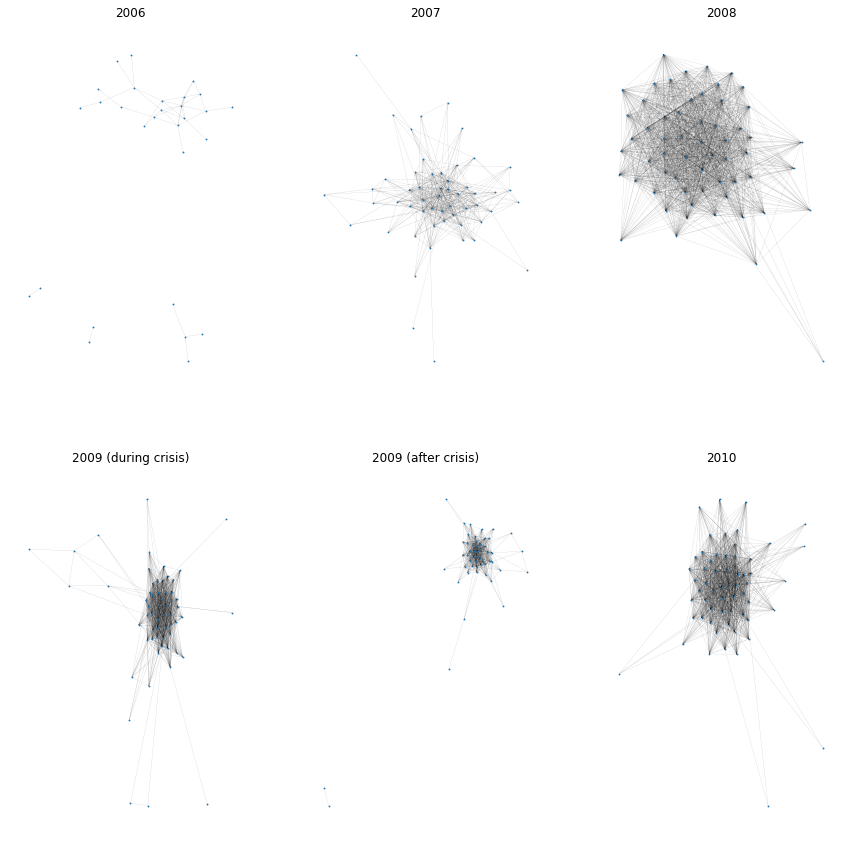

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
pos_2006 = nx.spring_layout(graph_2006, seed=0)
pos_2007 = nx.spring_layout(graph_2007, seed=0)
pos_2008 = nx.spring_layout(graph_2008, seed=0)
pos_2009_1 = nx.spring_layout(graph_2009_1, seed=0)
pos_2009_2 = nx.spring_layout(graph_2009_2, seed=0)
pos_2010 = nx.spring_layout(graph_2010, seed=0)
node_size = 0.7
edge_size = 0.05
axs[0,0].set_title("2006")
nx.draw(graph_2006, pos_2006, ax=axs[0,0], node_size=node_size, width=edge_size)
axs[0,1].set_title("2007")
nx.draw(graph_2007, pos_2007, ax=axs[0,1], node_size=node_size, width=edge_size)
axs[0,2].set_title("2008")
nx.draw(graph_2008, pos_2008, ax=axs[0,2], node_size=node_size, width=edge_size)
axs[1,0].set_title("2009 (during crisis)")
nx.draw(graph_2009_1, pos_2009_1, ax=axs[1,0], node_size=node_size, width=edge_size)
axs[1,1].set_title("2009 (after crisis)")
nx.draw(graph_2009_2, pos_2009_2, ax=axs[1,1], node_size=node_size, width=edge_size)
axs[1,2].set_title("2010")
nx.draw(graph_2010, pos_2010, ax=axs[1,2], node_size=node_size, width=edge_size)

Aside from the plots, we can compute several topological measures to look at the changes in the graph.

In [8]:
# diameter:
print("Diameter of these periods:")
print(" - 2007          : ", nx.diameter(graph_2007))
print(" - 2008          : ", nx.diameter(graph_2008))
print(" - 2009 (crisis) : ", nx.diameter(graph_2009_1))
print(" - 2010          : ", nx.diameter(graph_2010))

Diameter of these periods:
 - 2007          :  4
 - 2008          :  2
 - 2009 (crisis) :  4
 - 2010          :  3


In [9]:
# Radius:
print("Radius of these periods:")
print(" - 2007          : ", nx.radius(graph_2007))
print(" - 2008          : ", nx.radius(graph_2008))
print(" - 2009 (crisis) : ", nx.radius(graph_2009_1))
print(" - 2010          : ", nx.radius(graph_2010))

Radius of these periods:
 - 2007          :  2
 - 2008          :  1
 - 2009 (crisis) :  2
 - 2010          :  2


Since the algorithms for the diameter and the radius only provide a lower bound, one can think that the structure of those gaphs is the same. However, let us now observe the distribution of the neighbourhoods (i.e. the sum of the weights of neighbouring edges for each node).

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 22578.83it/s]


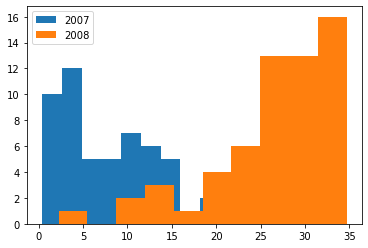

In [10]:
# Beware: algorithm is in O(n^2)
from graph_auxiliary_functions import neighbourhood_dist
nd_2007 = neighbourhood_dist(graph_2007)
nd_2008 = neighbourhood_dist(graph_2008)
plt.hist(nd_2007)
plt.hist(nd_2008)
plt.legend(["2007", "2008"])
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 31122.71it/s]


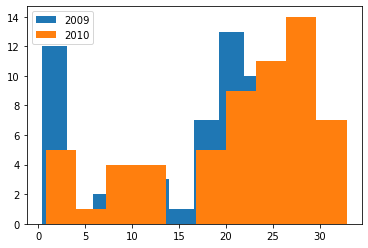

In [11]:
nd_2009_1 = neighbourhood_dist(graph_2009_1)
nd_2010 = neighbourhood_dist(graph_2010)
plt.hist(nd_2009_1)
plt.hist(nd_2010)
plt.legend(["2009", "2010"])
plt.show()

Let us look at centrality measures for a given asset in the SP500. The pagerank algorithm provides a dictionary with the pagerank for each node. We show the distribution of centrality by taking the values of this dictionary and drawing a histogram.

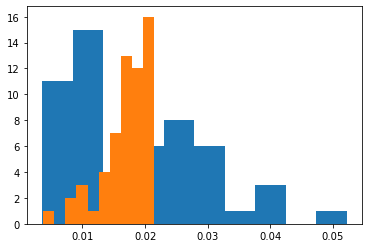

In [12]:
# centrality
plt.hist(nx.pagerank(graph_2007).values())
plt.hist(nx.pagerank(graph_2008).values())
plt.show()

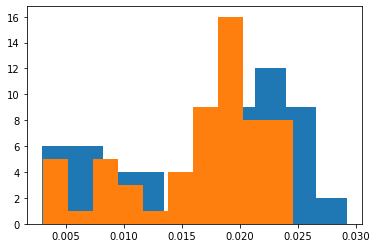

In [13]:
plt.hist(nx.pagerank(graph_2009_1).values())
plt.hist(nx.pagerank(graph_2010).values())
plt.show()

Minimum spanning trees

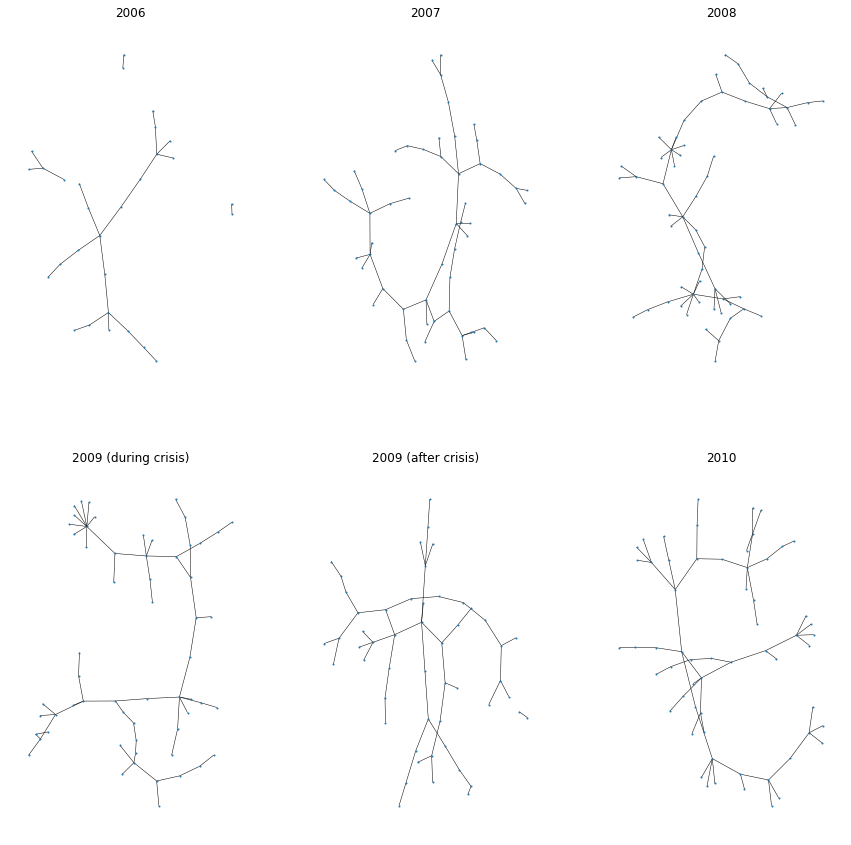

In [114]:
fig, axs = plt.subplots(2, 3, figsize=(15,15))
mst_2006 = nx.minimum_spanning_tree(graph_2006)
mst_2007 = nx.minimum_spanning_tree(graph_2007)
mst_2008 = nx.minimum_spanning_tree(graph_2008)
mst_2009_1 = nx.minimum_spanning_tree(graph_2009_1)
mst_2009_2 = nx.minimum_spanning_tree(graph_2009_2)
mst_2010 = nx.minimum_spanning_tree(graph_2010)
node_size = 1
edge_size = 0.5
axs[0,0].set_title("2006")
nx.draw(mst_2006, ax=axs[0,0], node_size=node_size, width=edge_size)
axs[0,1].set_title("2007")
nx.draw(mst_2007, ax=axs[0,1], node_size=node_size, width=edge_size)
axs[0,2].set_title("2008")
nx.draw(mst_2008, ax=axs[0,2], node_size=node_size, width=edge_size)
axs[1,0].set_title("2009 (during crisis)")
nx.draw(mst_2009_1, ax=axs[1,0], node_size=node_size, width=edge_size)
axs[1,1].set_title("2009 (after crisis)")
nx.draw(mst_2009_2, ax=axs[1,1], node_size=node_size, width=edge_size)
axs[1,2].set_title("2010")
nx.draw(mst_2010, ax=axs[1,2], node_size=node_size, width=edge_size)

In [126]:
corr_2007 = create_graph(df, '2007-01-01', '2008-01-01', threshold=0)
graph_2007 = nx.from_numpy_matrix(corr_2007)
cut_2007 = nx.minimum_edge_cut(graph_2007)
cut_2007

{(0, 44),
 (1, 44),
 (2, 44),
 (3, 44),
 (4, 44),
 (5, 44),
 (6, 44),
 (7, 44),
 (8, 44),
 (9, 44),
 (10, 44),
 (11, 44),
 (12, 44),
 (13, 44),
 (14, 44),
 (15, 44),
 (16, 44),
 (17, 44),
 (18, 44),
 (19, 44),
 (20, 44),
 (21, 44),
 (22, 44),
 (23, 44),
 (24, 44),
 (25, 44),
 (26, 44),
 (27, 44),
 (28, 44),
 (29, 44),
 (30, 44),
 (31, 44),
 (33, 44),
 (34, 44),
 (35, 44),
 (36, 44),
 (37, 44),
 (38, 44),
 (39, 44),
 (40, 44),
 (41, 44),
 (42, 44),
 (43, 44),
 (45, 44),
 (46, 44),
 (47, 44),
 (49, 44),
 (50, 44),
 (51, 44),
 (52, 44),
 (53, 44),
 (54, 44),
 (55, 44),
 (56, 44),
 (57, 44),
 (58, 44)}

In [127]:
cut_2007_bis = nx.stoer_wagner(graph_2007)
cut_2007_bis

(9.24173277339096,
 ([35],
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58]))

# Graph neural networks

In [14]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


Here is a generic trainer for any simple deep learning experiment. It allows for classification or regression and trains any object with a "forward" method. In particular, given a train/val/test splitted dataset, the trainer will update the model using the data in the train dataset as long as the val dataset hasn't triggered the early stopping mechanism. When early stopping is triggered, the trainer will load the best parameters encountered during training.

Methods evaluate and plot_losses allow for a *a posteriori* study of the training phase.

In [89]:
from torch.optim import Adam
from torch.nn import MSELoss, BCELoss
from tqdm import tqdm

import torch
from sklearn.metrics import accuracy_score, recall_score, mean_squared_error
import numpy


class Trainer:
    def __init__(self, model, task="classif", early_stopping=400, epochs=10000, lr=1e-3, weight_decay=0):
        # This class takes a torch Module like object as input and builds a trainer around it.
        self.model = model
        self.optimizer = Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        self.task=task
        
        # If we want to classify, the loss is set to be the binary cross entropy, otherwise we take the mean square error loss.
        if self.task == "classif":
            self.loss = BCELoss()
        else:
            self.loss = MSELoss()
            
        # These attributes will keep records of losses thoughout learning
        self.training_losses = []
        self.val_losses = []
        self.best_params = None
        
        # Default parameters for number of epochs and number of iterations before early stopping
        self.early_stopping = early_stopping
        self.epochs = numpy.linspace(1, epochs, epochs)
        
    def train(self, data_train, data_val=None, early_stopping=None, epochs=None):

        torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        self.training_losses=[]
        if early_stopping:
            self.early_stopping=early_stopping
        if epochs:
            self.epochs=numpy.linspace(1, epochs, epochs)
            
        if data_val is None:
            data_val = data_train
        
        for e in tqdm(self.epochs):
            # Very important: resetting the optimizer and ensuring the model is in train mode will avoid most coding errors.
            self.optimizer.zero_grad()
            self.model.train()
            
            # Prediction and loss computation
            loss = 0
            
            for data in data_train:
                y_pred = self.model(data)
                loss += self.loss(y_pred, data.y)
            loss /= len(data_train)
            
            # Back propagation of the gradient (backwards computes the gradient, step updates the weights)
            loss.backward()
            self.optimizer.step()
            
            self.training_losses.append(loss.detach())
            
            # Evaluating model on the validation set. 
            # no_grad bars the model from saving gradients computed on the validation set.
            # eval sets the model in evaluation mode, neutralising dropout.
            with torch.no_grad():
                self.model.eval()
                
                loss = 0
                for data in data_val:
                    y_pred = self.model(data)
                    loss += self.loss(y_pred, data.y)
                loss /= len(data_val)
                
                self.val_losses.append(loss.detach())
            
            # Early stopping mechanism: if the validation set loss has not decreased in the last n steps, then stop training
            # and return to best model.
            if self.val_losses[-1] == numpy.min(self.val_losses):
                self.best_params = self.model.state_dict()
            
            if len(self.val_losses)-numpy.argmin(self.val_losses) > self.early_stopping:
                break
        if self.early_stopping < len(self.epochs):
            # If early stopping enabled, the model reverts to its best configuration      
            self.model.load_state_dict(self.best_params)
        
    def predict(self, data_pred):
        self.model.eval()
        y = []
        for data in data_pred:
            y.append(self.model(data).detach().numpy())
        return numpy.array(y)

    def evaluate(self, data, must_return_value=False):
        y_pred = self.predict(data)
        errors = []
        f = lambda x : 1 if x > 0.5 else 0
        for i, d in enumerate(data):
            
            if self.task=="regression":
                errors.append(mean_squared_error(d.y, y_pred[i]))
            elif self.task=='classif':
                bool_predictions = numpy.array([f(x) for x in y_pred[i]])
                errors.append([accuracy_score(d.y, bool_predictions), recall_score(d.y,bool_predictions)])
                
        errors = numpy.array(errors)
        
        if not must_return_value:
        
            if self.task=="regression":
                print("MSE = ", numpy.mean(errors), "+/-", numpy.std(errors))
            elif self.task=="classif":
                print("accuracy = ", numpy.mean(errors[:,0]), "+/-", numpy.std(errors[:,0]))
                print("recall   = ", numpy.mean(errors[:,1]), "+/-", numpy.std(errors[:,1]))
                
        else:
            if self.task=="regression":
                return numpy.mean(errors)
            elif self.task=="classif":
                return numpy.mean(errors[:,0])
    
    def plot_losses(self):
        plt.figure(figsize=(12.8, 9.6))
        plt.plot(self.epochs[:len(self.training_losses)], self.training_losses)
        plt.plot(self.epochs[:len(self.val_losses)], self.val_losses)
        plt.legend(["training loss", "validation loss"])
        plt.show()

## graph layers

Find the complete doc of PyG at https://pytorch-geometric.readthedocs.io/en/latest/

In [23]:
from torch_geometric.nn import GCNConv, Sequential
from torch_geometric.utils.convert import from_networkx, to_networkx
from torch.nn import ReLU, Dropout, Linear, Sigmoid, Module

The GNN object class provides a generic architecture for graph neural networks using only one layer type from PyG. In particular, this architecture is not suited for temporal layers such as LSTMs, but accepts GCN, GAT, GraphSage, and so forth.

In [24]:
class Classical_MLP(Module):
    def __init__(self, x_dim, n_layers=2, h_dim=2, regression=False, dropout = 0):
        super(GNN, self).__init__()
        self.h_dim = h_dim
        self.x_dim = x_dim
        self.n_layers = n_layers
        # no dropout is default
        self.dropout = dropout

        # Stacking several layers in a sequential object
        layers = [(Linear(x_dim, h_dim), 'x -> x'), ReLU()]
        for k in range(self.n_layers-1):
            layers.append((Linear(h_dim, h_dim) , 'x -> x'))
            layers.append(ReLU())
            layers.append((Dropout(self.dropout), 'x -> x'))
        self.convs = Sequential('x, edge_index, edge_attr', layers)

        self.regression=regression
        self.conv2 = Linear(h_dim, 1)
        self.sigm = Sigmoid()
        
    def forward(self, inputs):
        y = self.convs(inputs.x)
        y = self.conv2(y)
        y = y.flatten()
        if not self.regression:
            y = self.sigm(y)
        return y

In [25]:
class GNN(Module):
    def __init__(self, x_dim, graph_layer=GCNConv, n_layers=2, h_dim=2, regression=False, dropout = 0):
        super(GNN, self).__init__()
        self.h_dim = h_dim
        self.x_dim = x_dim
        self.n_layers = n_layers
        # no dropout is default
        self.dropout = dropout

        # Stacking several layers in a sequential object
        layers = [(graph_layer(x_dim, h_dim), 'x, edge_index, edge_attr -> x'), ReLU()]
        for k in range(self.n_layers-1):
            layers.append((graph_layer(h_dim, h_dim) , 'x, edge_index, edge_attr -> x'))
            layers.append(ReLU())
            layers.append((Dropout(self.dropout), 'x -> x'))
        self.convs = Sequential('x, edge_index, edge_attr', layers)

        self.regression=regression
        self.conv2 = Linear(h_dim, 1)
        self.sigm = Sigmoid()
        
    def forward(self, inputs):
        y = self.convs(inputs.x, inputs.edge_index, inputs.edge_attr)
        y = self.conv2(y)
        y = y.flatten()
        if not self.regression:
            y = self.sigm(y)
        return y

## Return prediction

In this section, we will train a graph neural network to predict returns based on the last five days of data. The dataset construction code is located in the last section of graph_auxiliary_functions.py, where you can find :
- "adjacency_to_edge_index" which transforms an adjacency matrix into a edge index array (which is the base format for gaphs in PyG);
- "create_dataset" which uses these two functions to build the regression dataset with a train/val/test split.
- "create_classification_dataset" which uses these two functions to build the classification dataset with a train/val/test split.

In [26]:
import random

from graph_auxiliary_functions import create_dataset, create_classification_dataset

Let us look at the distribution of our classes:

In [32]:
data_train, data_val, data_test = create_dataset(df)
x_dim = data_train[0].x.numpy().shape[1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 343.19it/s]


In [59]:
model = GNN(x_dim, dropout=0.4, regression=True)
trainer = Trainer(model, task="regression")

trainer.train(data_train, data_val=data_val)

 11%|█████████████████▊                                                                                                                                                | 1097/10000 [04:09<33:42,  4.40it/s]


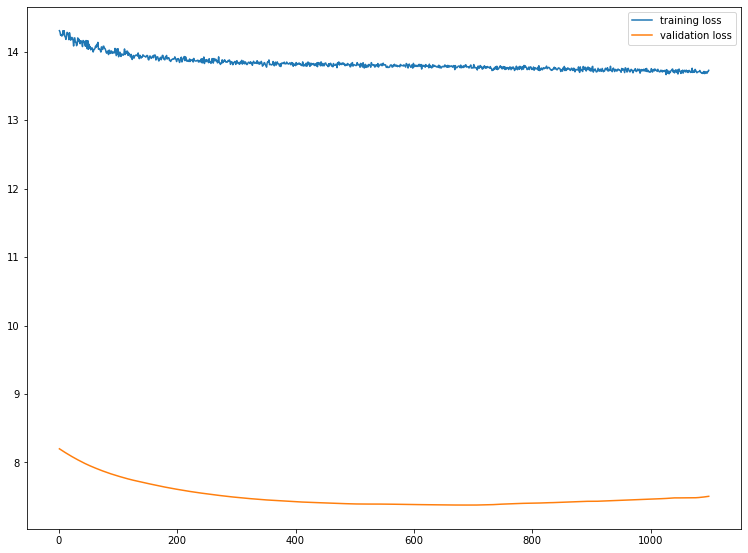

In [60]:
trainer.plot_losses()

In [61]:
trainer.evaluate(data_test)

MSE =  8.115498 +/- 12.817431


And now for some classification:

  6%|██████████▍                                                                                                                                                        | 644/10000 [02:25<35:08,  4.44it/s]


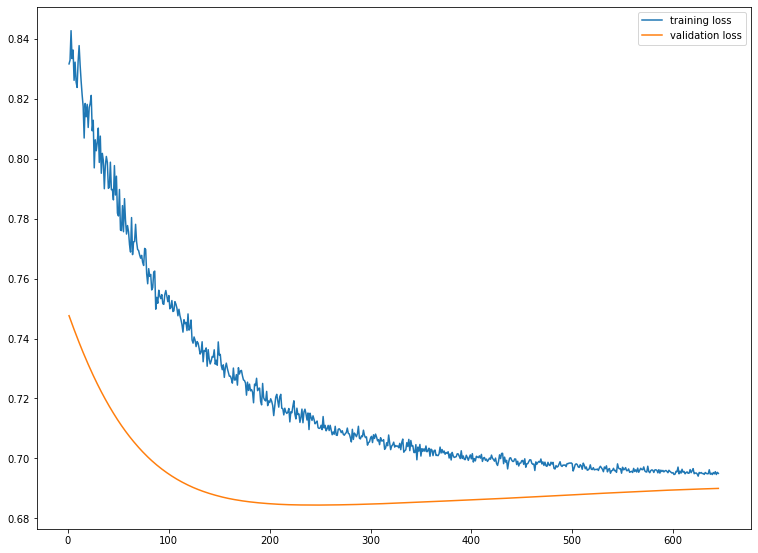

In [105]:
data_train, data_val, data_test = create_classification_dataset(df)
x_dim = data_train[0].x.numpy().shape[1]

model = GNN(x_dim, dropout=0.4, regression=False)
trainer = Trainer(model, task="classif")

trainer.train(data_train, data_val=data_val)

trainer.plot_losses()

In [106]:
trainer.evaluate(data_test)

accuracy =  0.4716666666666666 +/- 0.24962750026567362
recall   =  0.19917310000162292 +/- 0.36672395361310395


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For better results, you should probably try several hyperparameters, here is a generic grid search:

In [103]:
from torch_geometric.nn import GATConv

model_params = {
    "h_dim" : [2,3,4,5],
    "n_layers" : [2,3,4],
    "graph_layer" : [GCNConv, GATConv],
    "regression" : [True]
}

trainer_params = {
    "epochs" : [10],
    "early_stopping" : [5],
    "lr" : [1e-3],
    "task" : ["regression"],
}

def find_combinations(dico):
    """
    takes a dictionary of lists
    Generates a list of all possible parameters. Parameters are a dictionary with key the parameter name and value the parameter.
    """
    temp = list(dico.values())
    # cartesian product of all potential parameters
    comb_temp = list(itertools.product(*temp))
    # Reformatting into a list of dictionaries
    res = []
    for combi in comb_temp:
        res.append({key: val for key, val in zip(dico.keys(), combi)})
    return res

class GridTuner:
    def __init__(self, model_class, model_parameter_dict, trainer_parameter_dict):
        """
        takes a model class behaving like our MLP model, a dictionary of parameters like
        the one above, and a metric.
        """
        self.model_class = model_class
        # Transforming the dictionary of list into a list of each possible parameter combination
        self.model_candidate_params = find_combinations(model_parameter_dict)
        # same with trainer parameters
        self.trainer_candidate_params = find_combinations(trainer_parameter_dict)
        # remembering the best configurations
        self.best_metric = numpy.inf
        self.best_model_params = {}
        self.best_trainer_params = {}
        self.best_model = None

    def find_params(self, X_train, X_val, X_test):
        for model_params in self.model_candidate_params:
            for trainer_params in self.trainer_candidate_params:

                # training model using parameters
                x_dim = data_train[0].x.numpy().shape[1]
                model = self.model_class(x_dim, **model_params)
                trainer = Trainer(model, **trainer_params)
                trainer.train(X_train, X_val)

                # evaluating the model on the test set and on parameters
                m = trainer.evaluate(X_test, must_return_value=True)

                # If the model is better, keep the parameters in memory
                if self.best_metric == numpy.inf or m < self.best_metric:
                    self.best_model_params = model_params
                    self.best_trainer_params = trainer_params
                    self.best_model = model

    def get_best_params(self):
        # returns the best model and trainer hyperparameters
        return self.best_model_params, self.best_trainer_params

    def get_best_model(self):
        # returns the best model
        return self.best_model

In [104]:
# example on regression:
import itertools

#initialising the grid search
grid_searcher = GridTuner(GNN, model_params, trainer_params)
grid_searcher.find_params(data_train, data_val, data_test)

# printing the best parameters
grid_searcher.get_best_params()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.16s/it]


({'h_dim': 5,
  'n_layers': 4,
  'graph_layer': torch_geometric.nn.conv.gat_conv.GATConv,
  'regression': True},
 {'epochs': 10, 'early_stopping': 5, 'lr': 0.001, 'task': 'regression'})

In [ ]:
grid_searcher.get_best_model()